## Installations

In [1]:
#pip install Pillow
#pip install rembg

## Importing modules

In [2]:
#### Importing libraries
import requests
import numpy as np
from rembg import remove
from PIL import Image
from io import BytesIO

D:\ANALYTICS\_Software\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
# Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import cv2
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

## Removing the background

In [4]:
def loading_removing_background(url):
    '''
    Tuned for GitHub URLs of image files. Converts into raw URL, imports
    image from raw URL, removes the background, returns processed image.
    '''
    raw_url = url + '?raw=true'
    page = requests.get(raw_url)
    input_image = Image.open(BytesIO(page.content))
    output_image = remove(input_image)
    output_image = cv2.cvtColor(np.array(output_image), cv2.COLOR_RGB2BGR)
    return output_image

In [5]:
# Calling the function
#url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/lemon.png'
url = 'https://github.com/seblap86/mold_detection/blob/main/prototype/test_images/orange.png'
output = loading_removing_background(url)
#output

#### Some reshaping for whatever reason

In [6]:
#output = output.reshape(output.shape[0] * output.shape[1], output.shape[2])

In [7]:
#color_count = len(np.unique(output, axis=0))
#color_count

In [8]:
#output

## Importing the image into CV2

In [9]:
# Some styling stuff
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue', 'xkcd:scarlet']

In [10]:
'''
The main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. 
Considering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.

https://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca
'''

'\nThe main idea is that it is possible to use the image as a (N_rows X N_columns X N_channels) vector. \nConsidering this vector, it is possible to apply the K Means algorithm and identify k clusters, that will be our colors.\n\nhttps://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca\n'

In [11]:
# Functions
#def get_image(): # Gets the image
#    image = cv2.imread(image_path)
#    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#    return image

def RGB2HEX(color): # Gets the HEX code of a... pixel((?))
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [12]:
def get_image():
    open_cv_image = np.array(output)
    image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
    return image

In [13]:
# Loading the image
image = get_image()
#image = output

In [14]:
# Investigations - RGB format? (yes)
image[400]

array([[141,  73,  31],
       [141,  73,  31],
       [143,  75,  33],
       ...,
       [  1,   1,   1],
       [  1,   2,   2],
       [  1,   2,   2]], dtype=uint8)

In [15]:
# Height (in pixels) = Rows / first list elements of the array
len(image) 

725

In [16]:
len(image[0]) # Width (in pixels) = "Pixel row" of each height row / secondary elements of the array

1288

## Removing black background

In [17]:
image[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [18]:
image[0][0]

array([0, 0, 0], dtype=uint8)

In [19]:
non_background_pixels = []
i = 0
for height_pixel in image:
    for width_pixel in height_pixel:
        if width_pixel[0] > 25 and width_pixel[1] > 25 and width_pixel[2] > 25: # For now, 25 seems a safe threshold
            non_background_pixels.append(list(width_pixel))
            #print(width_pixel)
        #if width_pixel == ''
    #print(height_pixel[i])
    #i += 1
print(len(non_background_pixels))
non_background_pixels[0:50]

399312


[[27, 27, 34],
 [29, 31, 38],
 [32, 35, 43],
 [35, 38, 48],
 [40, 42, 53],
 [42, 44, 56],
 [45, 47, 59],
 [48, 49, 60],
 [51, 49, 60],
 [55, 51, 62],
 [60, 54, 64],
 [62, 54, 61],
 [63, 53, 59],
 [63, 53, 58],
 [60, 52, 55],
 [59, 52, 55],
 [55, 52, 55],
 [50, 50, 54],
 [46, 50, 56],
 [43, 51, 57],
 [38, 49, 57],
 [34, 47, 55],
 [32, 46, 55],
 [28, 43, 56],
 [27, 42, 54],
 [27, 40, 52],
 [31, 36, 43],
 [37, 39, 45],
 [45, 42, 46],
 [55, 47, 50],
 [61, 50, 50],
 [68, 52, 51],
 [78, 60, 56],
 [81, 62, 58],
 [84, 66, 63],
 [90, 71, 67],
 [96, 74, 70],
 [100, 76, 71],
 [106, 80, 73],
 [108, 79, 71],
 [111, 80, 70],
 [116, 83, 71],
 [120, 85, 72],
 [119, 83, 68],
 [123, 86, 69],
 [125, 87, 69],
 [119, 83, 65],
 [118, 83, 66],
 [117, 84, 71],
 [111, 83, 72]]

## Clustering the colors

In [20]:
number_of_colors = 10
#modified_image = non_background_pixels.reshape(non_background_pixels.shape[0]*non_background_pixels.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(non_background_pixels)

D:\ANALYTICS\_Software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
counts = Counter(labels)
center_colors = clf.cluster_centers_

# Getting ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

## Plotting the colors (centroids)

([<matplotlib.patches.Wedge at 0x1a3551d8210>,
 [Text(1.0911007259940448, 0.13963955648478843, '#c8c4c2'),
  Text(0.8867102330679163, 0.6509569590784338, '#b96824'),
  Text(0.4775405460607432, 0.9909364393683417, '#92aaae'),
  Text(-0.061776253767594755, 1.098263945720901, '#8d5225'),
  Text(-0.9515052663292458, 0.5519399678839276, '#f7a34c'),
  Text(-1.0563787397630195, -0.3066984808842305, '#f48d25'),
  Text(-0.3346945051129343, -1.0478452119694055, '#5a3b29'),
  Text(0.5873316901805036, -0.9300760644752197, '#dc7924'),
  Text(0.8689823241412495, -0.6744403015316274, '#a07a61'),
  Text(1.0757709118799978, -0.22960170982132966, '#d1aa91')])

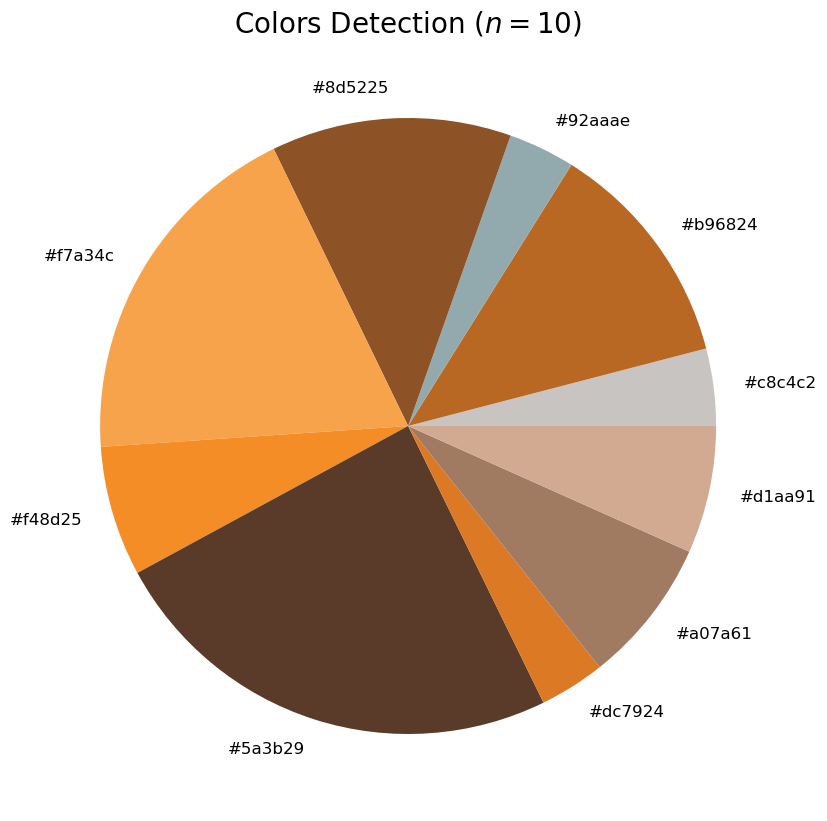

In [22]:
# Plotting the colors
plt.title(f'Colors Detection ($n={number_of_colors}$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)